
# Assignment-6 : Implement SGD For Linear Regression

## 1.0 Introduction 

(i).Linear regression is used for finding linear relationship between dependent (target) and independent (one or more predictors) variables.

## 2.0 Objective

Implement SGD (Stochastic Gradient Descent) for Linear Regression on scikit learn boston dataset.

## 3.0 Importing All Required Library

In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.datasets import load_boston
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error


from tqdm import tqdm
import os
import warnings
warnings.filterwarnings("ignore")

## 4.0 Importing Boston Dataset

In [2]:
Data = load_boston()

In [3]:
# Printing some data of DataFrame
Data.data.shape

(506, 13)

In [4]:
# Printing Features Name
Data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
BosData = pd.DataFrame(Data.data)

In [6]:
BosData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
BosData = (BosData - BosData.mean())/BosData.std()
BosData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [8]:
BosData['Price']=Data.target
BosData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [9]:
# Extracting Dependent(Y) and Independent Variable(X) From Dataset
X = BosData.drop('Price',axis=1)
Y = BosData['Price']

## 5.0 Information About DataSet

In [10]:
print("\nShape of Data: ", BosData.shape)
print("\nNumber of Attributes: 13 numeric/categorical predictive") 
print("\nMedian Value (attribute 14) is usually the target")


Shape of Data:  (506, 14)

Number of Attributes: 13 numeric/categorical predictive

Median Value (attribute 14) is usually the target


### 5.1 Attribute Information About DataSet

1.  CRIM     per capita crime rate by town

2.  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

3.  INDUS    proportion of non-retail business acres per town

4.  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5.  NOX      nitric oxides concentration (parts per 10 million)

6.  RM       average number of rooms per dwelling

7.  AGE      proportion of owner-occupied units built prior to 1940

8.  DIS      weighted distances to five Boston employment centres

9.  RAD      index of accessibility to radial highways

10. TAX      full-value property-tax rate per $10,000

11. PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

12. Missing Attribute Values: None

## 6.0 Splitting DataSet into Train and Test Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [12]:
X_train_new =X_train.copy()
X_train_new['Price']=Y_train

## 7.0 Defining Some Function

In [13]:
def Plot(y_test,y_pred):
    plt.scatter(y_test,y_pred)
    plt.grid()
    plt.title('Scatter plot between actual y and predicted y')
    plt.xlabel('Actual Y')
    plt.ylabel('Predicted Y')
    plt.show()   

In [14]:
def weight_display(W_Manual,W_Model):
    from prettytable import PrettyTable
    X=PrettyTable()
    W_Manual1=[]
    
    for i in np.array(weight_M):
        for j in i:
            W_Manual1.append(j)
    
    X.field_names=["S.No","Manual Implementation Weight","Model Implementation Weight"]
    for i in range(W_Manual.shape[0]):
        X.add_row([i+1,W_Manual1[i],W_Model[i]])
    print(X)    

In [15]:
def train_test_error_each_iteration(cost_train,cost_test):
    plt.figure()
    plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
    plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
    plt.title("Cost/Loss per iteration")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost/Loss")
    plt.legend()
    plt.show()

In [16]:
def Predict(x_test_data,w, b):
    y_pred=[]
    for i in range(len(x_test_data)):
        y=np.asscalar(np.dot(x_test_data[i],w)+b)
        y_pred.append(y)
    return np.array(y_pred)

In [17]:
def Manual_Implement_SGD(train_data,x_test,y_test,n_iter):
    
    w0_random = np.zeros(13)
    w0 = np.asmatrix(w0_random).T
    b0 = 0
    learning_rate=0.001
    n_iter = n_iter
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_iter):
        
        # Train sample
        train_sample = train_data.sample(180)
        y = np.asmatrix(train_sample["Price"])
        x = np.asmatrix(train_sample.drop("Price", axis = 1))
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
        w1 = w0 - learning_rate * partial_deriv_m 
        b1 = b0 - learning_rate * partial_deriv_b
        
        if (w0==w1).all():
            break
        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2
          
        error_train = cost_function(b0,w0,x, y)
        cost_train.append(error_train)
        error_test = cost_function(b0,w0,np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
    return w0, b0, cost_train, cost_test

In [18]:
def Sklearn_SGD(X_train,Y_train,n_iter):
    
    model=SGDRegressor(penalty=None,n_iter=n_iter)
    model.fit(X_train,Y_train)
    
    return model

In [19]:
def cost_function(b, m, features, target):
    totalError = 0
    for i in range(0, len(features)):
        x = features
        y = target
        totalError += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
    return totalError / len(x)

# 7.0 Taking Iteration Value 100

### 7.1 Manual Implementation Of SGD

In [20]:
weight_M,b_M,cost_train,cost_test=Manual_Implement_SGD(X_train_new,X_test,Y_test,100)

In [21]:
Y_Pred_M =Predict(np.asmatrix(X_test),weight_M,b_M)

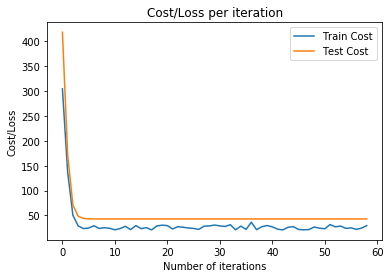

In [22]:
train_test_error_each_iteration(cost_train,cost_test)

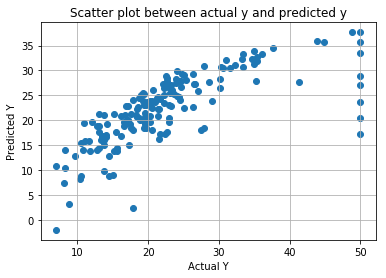

In [23]:
Plot(Y_test,Y_Pred_M)

In [24]:
print("Mean Squared Error : ",cost_function(b_M,weight_M,np.asmatrix(X_test), np.asmatrix(Y_test)))

Mean Squared Error :  [[43.09968728]]


### 7.2 Sklearn Implementation of SGD

In [25]:
model=Sklearn_SGD(X_train,Y_train,100)

In [26]:
Y_Pred_F = model.predict(X_test)

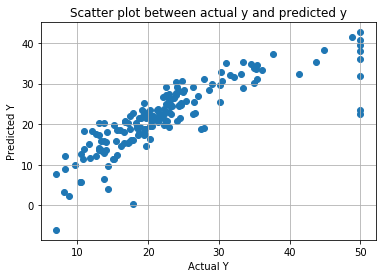

In [27]:
Plot(Y_test,Y_Pred_F)

In [28]:
print("Mean Squared Error : ",mean_squared_error(Y_test,Y_Pred_F))

Mean Squared Error :  28.399369258523045


In [29]:
weight_F=model.coef_
b_F=model.intercept_

### 7.3 Comparison Between Sklearn & Manual Implementation

 #### 7.3.1 Intercept Information

In [30]:
print("Intercept of Manaual Implementation : ",b_M)
print("Intercept of Sklearn Implementation",b_F)

Intercept of Manaual Implementation :  [[22.89659758]]
Intercept of Sklearn Implementation [22.318952]


#### 7.3.2 Weight Obtained By Manual & Sklearn Implementation

In [31]:
weight_display(weight_M,weight_F)

+------+------------------------------+-----------------------------+
| S.No | Manual Implementation Weight | Model Implementation Weight |
+------+------------------------------+-----------------------------+
|  1   |     -1.2670709987790072      |     -1.3160154638748793     |
|  2   |     0.24796297357026736      |      0.8710479589945289     |
|  3   |     -1.3778449938148662      |     -0.2761286381756941     |
|  4   |      -1.174926735255015      |     0.21051742479960323     |
|  5   |     0.14177883122073878      |      -1.487184369583639     |
|  6   |      2.6251943051315623      |      2.8254239527450684     |
|  7   |      -1.48503529720376       |     -0.33957484929683285    |
|  8   |     -1.7276450446917608      |      -2.902389812828027     |
|  9   |      1.1467227427461884      |      2.6454220157745776     |
|  10  |     -0.7447874319319048      |      -1.891187529155848     |
|  11  |     -0.7304981882287312      |     -2.1199105577453623     |
|  12  |      1.2654

# 8.0 Taking Iteration Value of 500

### 8.1 Manual Implementation Of SGD

In [32]:
weight_M,b_M,cost_train,cost_test=Manual_Implement_SGD(X_train_new,X_test,Y_test,500)

In [33]:
Y_Pred_M =Predict(np.asmatrix(X_test),weight_M,b_M)

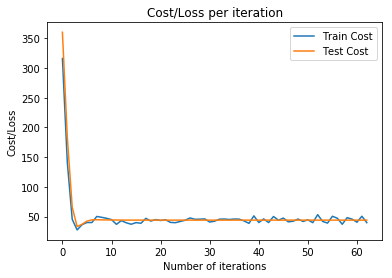

In [34]:
train_test_error_each_iteration(cost_train,cost_test)

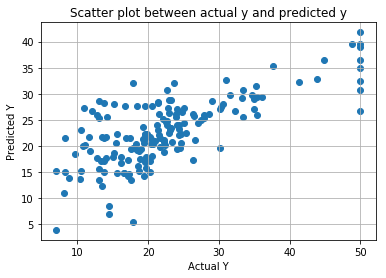

In [35]:
Plot(Y_test,Y_Pred_M)

In [36]:
print("Mean Squared Error : ",cost_function(b_M,weight_M,np.asmatrix(X_test), np.asmatrix(Y_test)))

Mean Squared Error :  [[44.1459459]]


### 8.2 Sklearn Implementation of SGD

In [37]:
model=Sklearn_SGD(X_train,Y_train,500)

In [38]:
Y_Pred_F = model.predict(X_test)

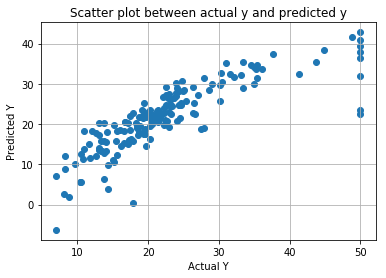

In [39]:
Plot(Y_test,Y_Pred_F)

In [40]:
print("Mean Squared Error : ",mean_squared_error(Y_test,Y_Pred_F))

Mean Squared Error :  28.5272168184641


In [41]:
weight_F=model.coef_
b_F=model.intercept_

### 8.3 Comparison Between Sklearn & Manual Implementation

#### 8.3.1 Intercept Information

In [42]:
print("Intercept of Manaual Implementation : ",b_M)
print("Intercept of Sklearn Implementation",b_F)

Intercept of Manaual Implementation :  [[23.15133995]]
Intercept of Sklearn Implementation [22.31300041]


#### 8.3.2 Weight Obtained By Manual & Sklearn Implementation

In [43]:
weight_display(weight_M,weight_F)

+------+------------------------------+-----------------------------+
| S.No | Manual Implementation Weight | Model Implementation Weight |
+------+------------------------------+-----------------------------+
|  1   |     -0.45699301358919114     |     -1.3477172686121794     |
|  2   |     0.30690699548744876      |      0.8996382535154619     |
|  3   |     0.20186466954322435      |     -0.1745415300597715     |
|  4   |      0.4763343944510008      |      0.2030867835628962     |
|  5   |      0.3502708614805677      |     -1.5062877147540947     |
|  6   |      3.3619985529004266      |      2.814051651509481      |
|  7   |     -0.8366886910291909      |     -0.32613184726357003    |
|  8   |     -2.3336383337824227      |      -2.88658255546854      |
|  9   |      2.4416782421545875      |      2.9743497011704334     |
|  10  |      0.8126251112622226      |      -2.274478787451737     |
|  11  |     -1.5191217506661354      |      -2.14066542479728      |
|  12  |      1.7961

# 9.0 Taking Iteration Value 1000

### 9.1 Manual Implementation Of SGD

In [44]:
weight_M,b_M,cost_train,cost_test=Manual_Implement_SGD(X_train_new,X_test,Y_test,10000)

In [45]:
Y_Pred_M =Predict(np.asmatrix(X_test),weight_M,b_M)

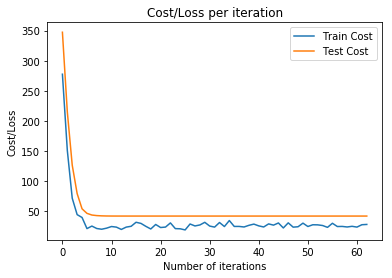

In [46]:
train_test_error_each_iteration(cost_train,cost_test)

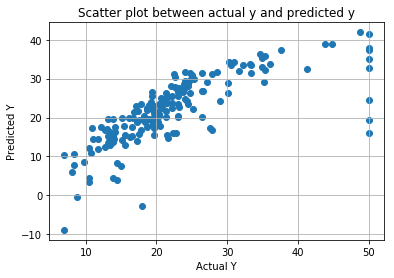

In [47]:
Plot(Y_test,Y_Pred_M)

In [48]:
print("Mean Squared Error : ",cost_function(b_M,weight_M,np.asmatrix(X_test), np.asmatrix(Y_test)))

Mean Squared Error :  [[41.73049258]]


### 9.2 Sklearn Implementation Of SGD

In [49]:
model=Sklearn_SGD(X_train,Y_train,1000)

In [50]:
Y_Pred_F = model.predict(X_test)

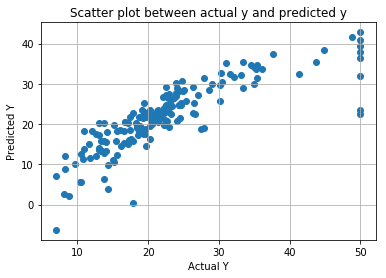

In [51]:
Plot(Y_test,Y_Pred_F)

In [52]:
print("Mean Squared Error : ",mean_squared_error(Y_test,Y_Pred_F))

Mean Squared Error :  28.564463703174166


In [53]:
weight_F=model.coef_
b_F=model.intercept_

### 9.3 Comparison Between Sklearn & Manual Implementation

 #### 9.3.1 Intercept Information

In [54]:
print("Intercept of Manaual Implementation : ",b_M)
print("Intercept of Sklearn Implementation",b_F)

Intercept of Manaual Implementation :  [[22.58776205]]
Intercept of Sklearn Implementation [22.30754811]


#### 9.3.2 Weight Obtained By Manual & Sklearn Implementation

In [55]:
weight_display(weight_M,weight_F)

+------+------------------------------+-----------------------------+
| S.No | Manual Implementation Weight | Model Implementation Weight |
+------+------------------------------+-----------------------------+
|  1   |     -1.5032586158351413      |     -1.3430347820333557     |
|  2   |    -0.025389937015346132     |      0.9028344688806086     |
|  3   |     -0.3262986046327045      |      -0.177005332776656     |
|  4   |     -1.3194221563062645      |     0.19697065607736197     |
|  5   |      -0.361781564394641      |      -1.50622407890077      |
|  6   |      3.435069453285313       |      2.8167857631940514     |
|  7   |     -2.1264509712022317      |     -0.32839865940779006    |
|  8   |     -2.0100401644101233      |     -2.8779461148219654     |
|  9   |      0.8097034039124889      |      2.9766620497157272     |
|  10  |     -0.23711099431954244     |     -2.2827481883146703     |
|  11  |      -2.070273871064911      |      -2.138725396009798     |
|  12  |      1.1313

# 10.0 Taking Iteration 10000

### 10.1 Manual Implementation Of SGD

In [60]:
weight_M,b_M,cost_train,cost_test=Manual_Implement_SGD(X_train_new,X_test,Y_test,10000)

In [61]:
Y_Pred_M =Predict(np.asmatrix(X_test),weight_M,b_M)

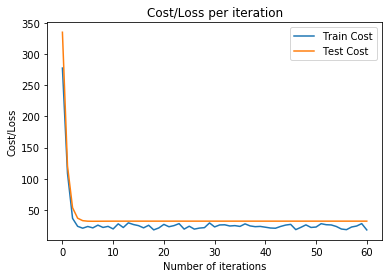

In [62]:
train_test_error_each_iteration(cost_train,cost_test)

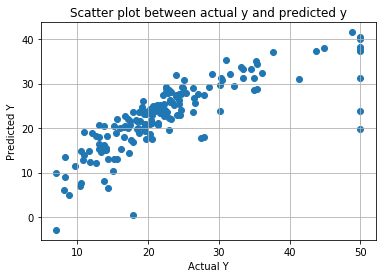

In [63]:
Plot(Y_test,Y_Pred_M)

In [64]:
print("Mean Squared Error : ",cost_function(b_M,weight_M,np.asmatrix(X_test), np.asmatrix(Y_test)))

Mean Squared Error :  [[31.84742686]]


### 10.2 Sklearn Implementation Of SGD

In [65]:
model=Sklearn_SGD(X_train,Y_train,10)

In [66]:
Y_Pred_F = model.predict(X_test)

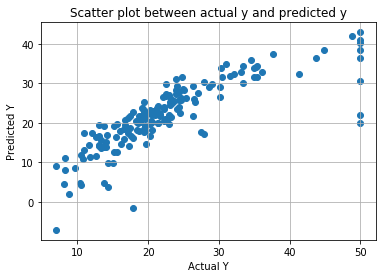

In [67]:
Plot(Y_test,Y_Pred_F)

In [69]:
print("Mean Squared Error : ",mean_squared_error(Y_test,Y_Pred_F))

Mean Squared Error :  30.551503948527454


In [70]:
weight_F=model.coef_
b_F=model.intercept_

### 10.3 Comparison Between Sklearn & Manual Implementation

#### 10.3.1 Intercept Information

In [71]:
print("Intercept of Manaual Implementation : ",b_M)
print("Intercept of Sklearn Implementation",b_F)

Intercept of Manaual Implementation :  [[23.15849266]]
Intercept of Sklearn Implementation [22.28967489]


#### Weight Obtained By Manual & Sklearn Implementation

In [72]:
weight_display(weight_M,weight_F)

+------+------------------------------+-----------------------------+
| S.No | Manual Implementation Weight | Model Implementation Weight |
+------+------------------------------+-----------------------------+
|  1   |     -0.8575878949668416      |     -1.1941218861345153     |
|  2   |      -0.718640292119655      |      0.5208726294053448     |
|  3   |     -1.4972534445048742      |     -0.5725776219759126     |
|  4   |      0.6247167112277762      |      0.2457938707302134     |
|  5   |     -0.21252270634222556     |     -0.9278945253668555     |
|  6   |      2.9194362815342383      |      3.177284180179496      |
|  7   |     -0.9217320997936677      |     -0.5541056564842918     |
|  8   |     -1.7972666402070991      |     -2.1178567502413355     |
|  9   |      0.876372735298303       |      1.241108327077085      |
|  10  |     -0.5456206398935565      |     -0.8477992087671062     |
|  11  |      -1.953157742110251      |     -2.0746385459929675     |
|  12  |      1.3871

# Conclusion

### 1.0  Manual Implementation Report

In [76]:
from prettytable import PrettyTable
X=PrettyTable()
X.field_names =["Iteration","Intercept","Mean-Squared-Error"]
X.add_row([100,22.89,43.09])
X.add_row([500,23.15,44.14])
X.add_row([1000,22.58,41.73])
X.add_row([10000,23.15,31.84])
print(X)

+-----------+-----------+--------------------+
| Iteration | Intercept | Mean-Squared-Error |
+-----------+-----------+--------------------+
|    100    |   22.89   |       43.09        |
|    500    |   23.15   |       44.14        |
|    1000   |   22.58   |       41.73        |
|   10000   |   23.15   |       31.84        |
+-----------+-----------+--------------------+


### 2.0 Sklearn Implementation Report

In [77]:
from prettytable import PrettyTable
X=PrettyTable()
X.field_names =["Iteration","Intercept","Mean-Squared-Error"]
X.add_row([100,22.31,28.39])
X.add_row([500,22.31,28.52])
X.add_row([1000,22.30,28.56])
X.add_row([10000,22.28,30.55])
print(X)

+-----------+-----------+--------------------+
| Iteration | Intercept | Mean-Squared-Error |
+-----------+-----------+--------------------+
|    100    |   22.31   |       28.39        |
|    500    |   22.31   |       28.52        |
|    1000   |    22.3   |       28.56        |
|   10000   |   22.28   |       30.55        |
+-----------+-----------+--------------------+


3.0 I have used Boston House Price Dataset.

4.0 In Manaul Implementation ,As suggested i decreased the learning rate by half everytime then the value of mean squared error decreased first then again increased.